### Exploratory Data Analysis for Movie data -- Part 2

### *Preprocess the Left Data*

In [1]:
# Make the chunk output all results not only the last result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Import libraries
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
from datetime import datetime
#import lightgbm as lgb
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, KFold
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
#import lightgbm as lgb
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import json
import ast
#import shap
from urllib.request import urlopen
from sklearn.preprocessing import LabelEncoder
import time
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hongyang.zheng\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Load data
train=pd.read_csv("1_new_train.csv")
test=pd.read_csv("1_new_test.csv")

# Look at the data
train.head(10)

# Shape
train.shape
test.shape

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,collection,n_collection,pure_genres,n_genres,company,n_company,country,n_country,>1_country,language,n_lan,word,word_div,Crew,n_crew,initial_crew,crew_top,crew_top_ratio,Cast,n_cast,initial_cast,cast_top,cast_top_ratio
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Hot Tub Time Machine Collection,1,['Comedy'],1,"['Paramount Pictures', 'United Artists', 'Metr...",3,['United States of America'],1,0,['English'],1,"['time travel', 'sequel', 'hot tub', 'duringcr...",4,"['Kelly Cantley', 'Steve Pink', 'Josh Heald', ...",72,"['Kelly Cantley', 'Steve Pink', 'Josh Heald', ...",1,0.013889,"['Rob Corddry', 'Craig Robinson', 'Clark Duke'...",24,"['Rob Corddry', 'Craig Robinson', 'Clark Duke'...",3,0.125000
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,The Princess Diaries Collection,1,"['Comedy', 'Drama', 'Family', 'Romance']",4,['Walt Disney Pictures'],1,['United States of America'],1,0,['English'],1,"['coronation', 'duty', 'marriage', 'falling in...",4,"['Garry Marshall', 'Charles Minsky', 'John Deb...",9,"['Garry Marshall', 'Charles Minsky', 'John Deb...",2,0.222222,"['Anne Hathaway', 'Julie Andrews', 'H√©ctor El...",20,"['Anne Hathaway', 'Julie Andrews', 'H√©ctor El...",4,0.200000
2,3,{},3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,NaN,0,['Drama'],1,"['Bold Films', 'Blumhouse Productions', 'Right...",3,['United States of America'],1,0,['English'],1,"['jazz', 'obsession', 'conservatory', 'music t...",12,"['Terri Taylor', 'Richard Henderson', 'Jeffrey...",64,"['Terri Taylor', 'Richard Henderson', 'Jeffrey...",3,0.046875,"['Miles Teller', 'J.K. Simmons', 'Melissa Beno...",51,"['Miles Teller', 'J.K. Simmons', 'Melissa Beno...",1,0.019608
3,4,{},1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,{},"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Release

(3000, 46)

(4398, 45)

In [4]:
# Write a function to do this for both train and test dataset
def convert_json(df):
    columns_need_convert=['belongs_to_collection', 'genres', 'production_companies',
                          'production_countries', 'spoken_languages', 'Keywords', 
                          'cast', 'crew']
    for name in columns_need_convert:
        df[name]=df[name].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
    
    return(df)

train=convert_json(train)
test=convert_json(test)

After preprocessing the columns containing one or more dictionaries in part1, next, let's explore the left column.

### Next, look at other columns

They are `revenue`, `budget`, `homepage`, `original_language`, `overview`, `popularity`, `release_date`, `runtime`, `status` and `tagline`.

#### *revenue*

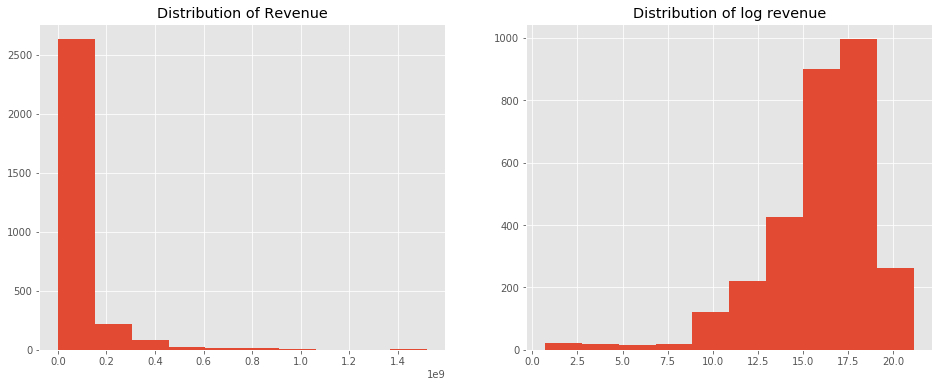

In [5]:
# Summary Statistics
train['revenue'].describe()

# Histogram
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(train['revenue']);
plt.title('Distribution of Revenue');

# Highly skewed --> convert to log(revenue)
train['log_revenue']=np.log1p(train['revenue'])
plt.subplot(1, 2, 2)
plt.hist(train['log_revenue']);
plt.title('Distribution of log revenue');

#### *budget*

In [6]:
# Summary Statistics
train['budget'].describe()
test['budget'].describe()

count    3.000000e+03
mean     2.253133e+07
std      3.702609e+07
min      0.000000e+00
25%      0.000000e+00
50%      8.000000e+06
75%      2.900000e+07
max      3.800000e+08
Name: budget, dtype: float64

count    4.398000e+03
mean     2.264929e+07
std      3.689991e+07
min      0.000000e+00
25%      0.000000e+00
50%      7.450000e+06
75%      2.800000e+07
max      2.600000e+08
Name: budget, dtype: float64

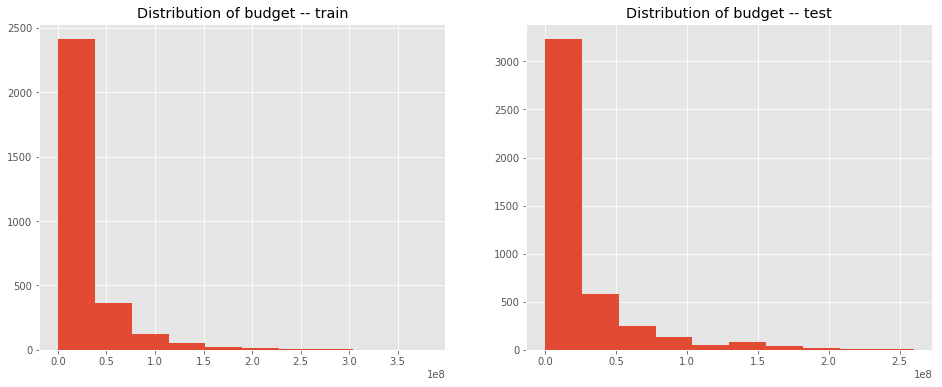

In [7]:
# Plot histogram
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(train['budget']);
plt.title('Distribution of budget -- train');

plt.subplot(1, 2, 2)
plt.hist(test['budget']);
plt.title('Distribution of budget -- test');

The distribution of budget for train and test dataset is similar but highly skewed, we need to convert it into log form.

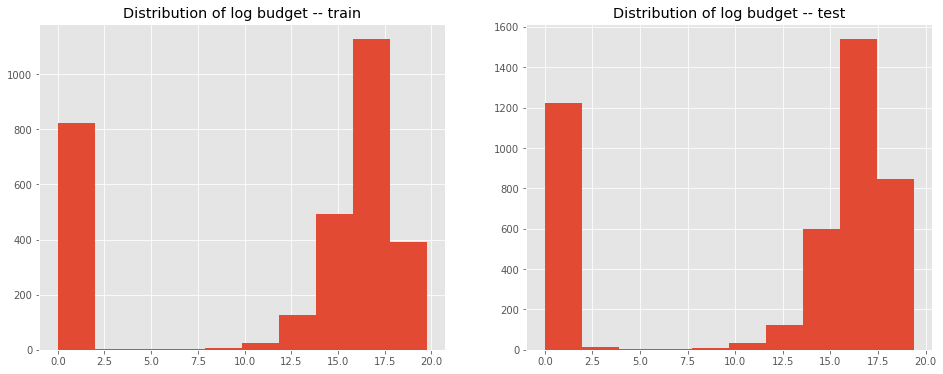

In [8]:
# Convert budget into log(budget)
train['log_budget']=np.log1p(train['budget'])
test['log_budget']=np.log1p(test['budget'])

# Plot histogram
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(train['log_budget']);
plt.title('Distribution of log budget -- train');

plt.subplot(1, 2, 2)
plt.hist(test['log_budget']);
plt.title('Distribution of log budget -- test');

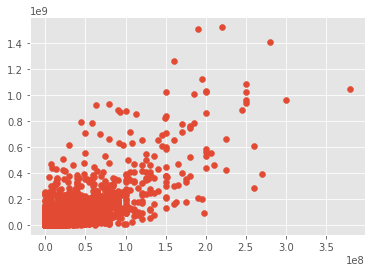

In [38]:
# scatter plot of budget and revenue
plt.scatter(train['budget'], train['revenue'])

#### *homepage*

Since most of the value in homepage column is unique, I want to convert homepage into a binary variable, such that 
    * 0--no homepage
    * 1--has homepage

In [9]:
# Create a new binary column
train['homepage_y']=0
train.loc[train['homepage'].isnull() == False, 'homepage_y'] = 1

test['homepage_y']=0
test.loc[test['homepage'].isnull() == False, 'homepage_y'] = 1

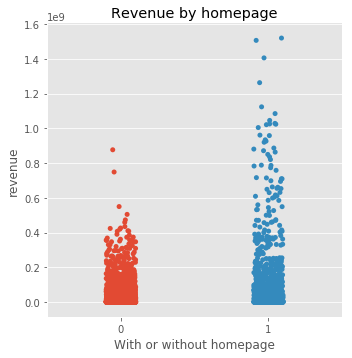

In [40]:
# Scatter plot
ax = sns.catplot(x='homepage_y', y='revenue', data=train);
ax.set(xlabel='With or without homepage', ylabel='revenue', title='Revenue by homepage')
plt.show()

It seems that the movie with homepage tends to have higher revenue.

#### *original_language*

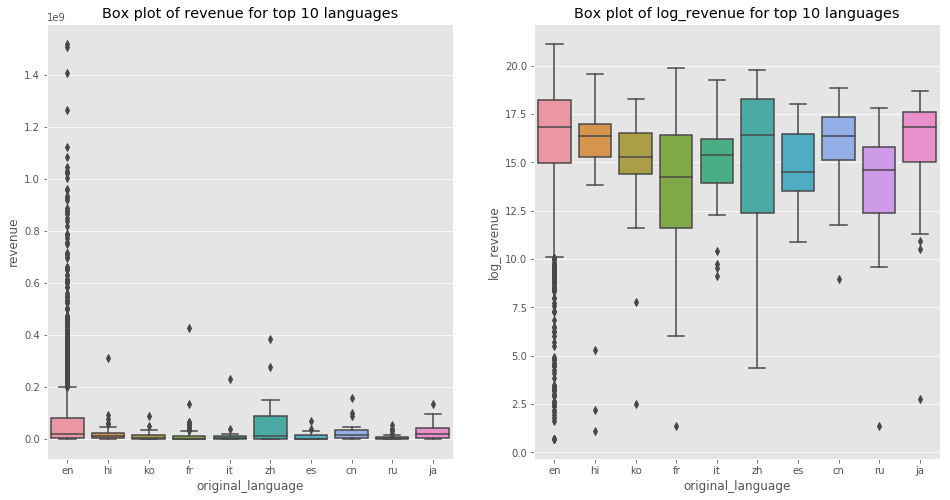

In [11]:
# Box plot
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x='original_language', y='revenue', 
            data=train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)]);
plt.title('Box plot of revenue for top 10 languages');

# Box plot for log revenue
plt.subplot(1, 2, 2)
sns.boxplot(x='original_language', y='log_revenue', 
            data=train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)]);
plt.title('Box plot of log_revenue for top 10 languages');

After converting to log box plot, we can see that for each language, there exits some high-revenue movies, though there are more movies with english as original language are high-revenue. 

#### *overview*

<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'Top words in overview -- train')

(-0.5, 1199.5, 999.5, -0.5)

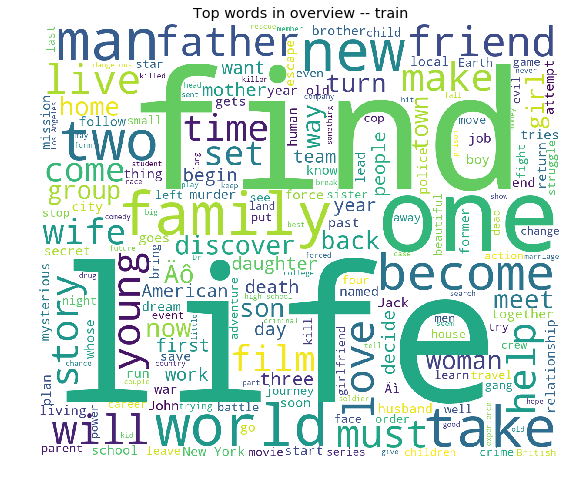

In [12]:
# Word cloud for train
plt.figure(figsize=(16, 8))
text = ' '.join(train['overview'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in overview -- train')
plt.axis("off")
plt.show()

<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'Top words in overview -- test')

(-0.5, 1199.5, 999.5, -0.5)

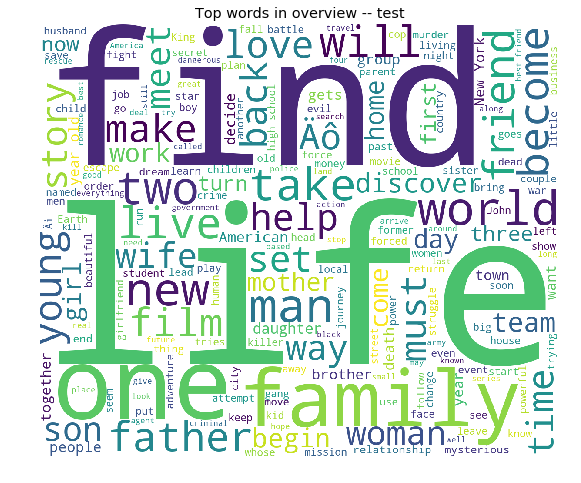

In [13]:
# Word cloud for test
plt.figure(figsize=(16, 8))
text = ' '.join(test['overview'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in overview -- test')
plt.axis("off")
plt.show()

#### *popularity*

In [14]:
# Summary Statistics
train['popularity'].describe()
test['popularity'].describe()

count    3000.000000
mean        8.463274
std        12.104000
min         0.000001
25%         4.018053
50%         7.374861
75%        10.890983
max       294.337037
Name: popularity, dtype: float64

count    4398.000000
mean        8.550230
std        12.209014
min         0.000001
25%         3.895186
50%         7.482241
75%        10.938524
max       547.488298
Name: popularity, dtype: float64

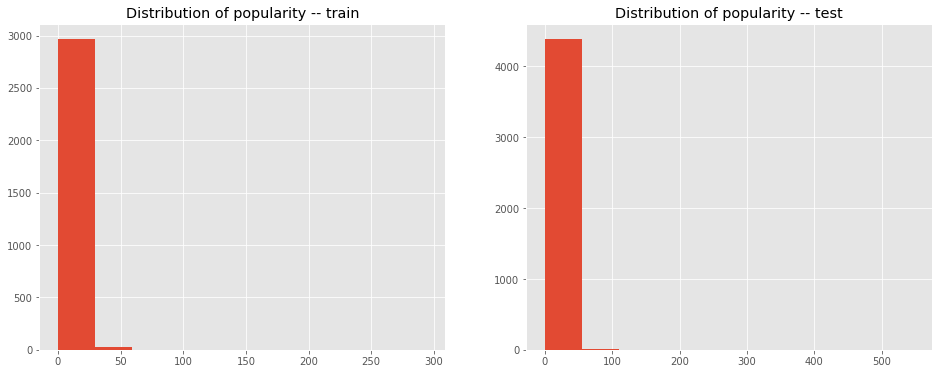

In [15]:
# Plot histogram
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(train['popularity']);
plt.title('Distribution of popularity -- train');

plt.subplot(1, 2, 2)
plt.hist(test['popularity']);
plt.title('Distribution of popularity -- test');

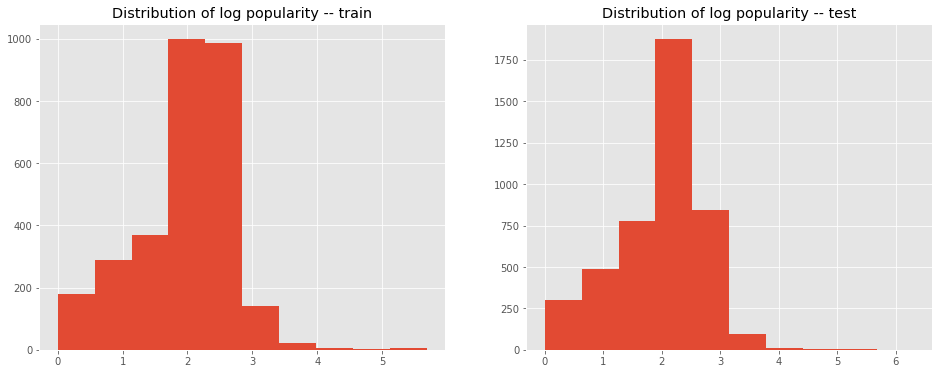

In [16]:
# Convert popularity into log(popularity)
train['log_popularity']=np.log1p(train['popularity'])
test['log_popularity']=np.log1p(test['popularity'])

# Plot histogram
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(train['log_popularity']);
plt.title('Distribution of log popularity -- train');

plt.subplot(1, 2, 2)
plt.hist(test['log_popularity']);
plt.title('Distribution of log popularity -- test');

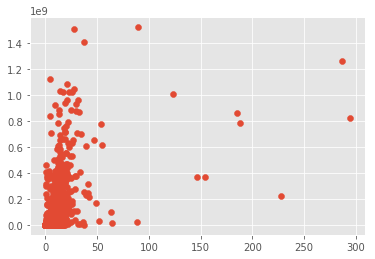

In [44]:
# scatter plot of revenue and popularity
plt.scatter(train['popularity'], train['revenue'])

#### *release_date*

In [48]:
# Check the NAs
sum(train['release_date'].isna())
sum(test['release_date'].isna())


0

KeyError: 'release_date'

In [18]:
# There is no NA
# Look at the data
train['release_date'].value_counts().head()

9/10/15    5
9/10/10    5
9/5/03     4
9/15/06    4
7/18/13    4
Name: release_date, dtype: int64

I want to convert release_date column into datetime type, so then I can extract attributes I want to use very easy. To do that, I found the format of date in this column is not a standard format to convert. Therefore, the first step is to fix the format.

In [19]:
# Function to fix the format
def fix_format(x):
    month, day, year = x.split('/')
    if len(month)==1:
        month="0"+month
        
    if len(day)==1:
        day="0"+day
        
    if int(year)<=19:
        year="20"+year
    else:
        year="19"+year
        
    return(month+"/"+day+"/"+year)
                               
# Convert the column
train['release_time']=train["release_date"].apply(lambda x: datetime.strptime(fix_format(x), "%m/%d/%Y"))
train['release_time'].head()

0   2015-02-20
1   2004-08-06
2   2014-10-10
3   2012-03-09
4   2009-02-05
Name: release_time, dtype: datetime64[ns]

In [20]:
# Extract year, month, DOW
train['year']=train['release_time'].apply(lambda x: x.year)
train['month']=train['release_time'].apply(lambda x: x.month)
train['DOW']=train['release_time'].apply(lambda x: x.weekday())    

In [21]:
# Write a function to create season
def season(row):
    if row['month']==3 or row['month']==4 or row['month']==5:
        return("Spring")
    elif row['month']==6 or row['month']==7 or row['month']==8:
        return("Summer")
    elif row['month']==9 or row['month']==10 or row['month']==11:
        return("Autumn")
    elif row['month']==12 or row['month']==1 or row['month']==2:
        return("Winter")

In [22]:
# Create a new column 'season'
train['season']=train.apply(lambda row:season(row), axis=1)

train['season'].head()

0    Winter
1    Summer
2    Autumn
3    Spring
4    Winter
Name: season, dtype: object

In [23]:
# Write a function to create weekend
def weekend(row):
    if row['DOW']==0 or row['DOW']==6:
        return("Weekend")
    else:
        return("Weekday")

In [24]:
# Create a new column 'Weekend'
train['Weekend']=train.apply(lambda row: weekend(row), axis=1)

train['Weekend'].head()

0    Weekday
1    Weekday
2    Weekday
3    Weekday
4    Weekday
Name: Weekend, dtype: object

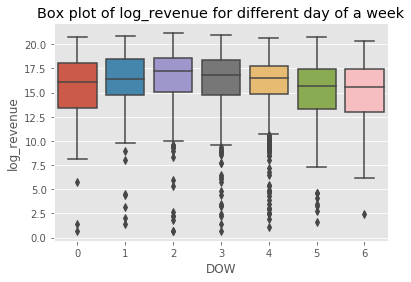

In [25]:
# Box plot for log revenue and DOW
sns.boxplot(x='DOW', y='log_revenue', data=train);
plt.title('Box plot of log_revenue for different day of a week');

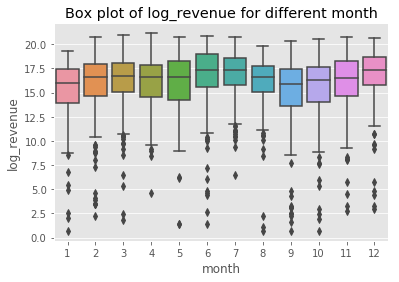

In [26]:
# Box plot for log revenue and month
sns.boxplot(x='month', y='log_revenue', data=train);
plt.title('Box plot of log_revenue for different month');

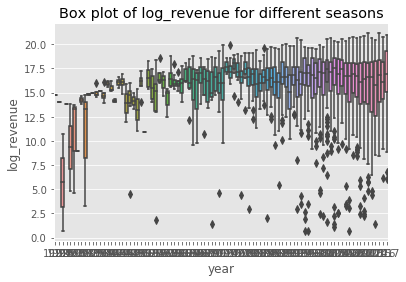

In [27]:
# Line plot for log revenue and year
sns.boxplot(x='year', y='log_revenue', data=train);
plt.title('Box plot of log_revenue for different seasons');

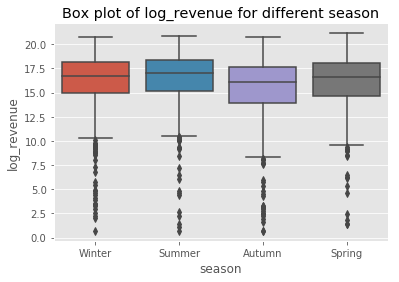

In [28]:
# Box plot for log revenue and season
sns.boxplot(x='season', y='log_revenue', data=train);
plt.title('Box plot of log_revenue for different season');

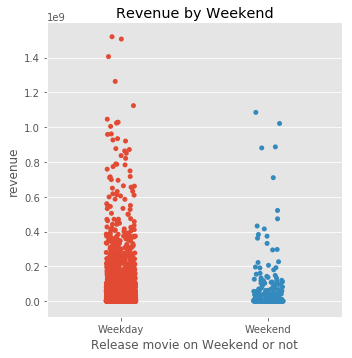

In [29]:
# Scatter plot
ax = sns.catplot(x='Weekend', y='revenue', data=train);
ax.set(xlabel='Release movie on Weekend or not', ylabel='revenue', title='Revenue by Weekend')
plt.show()

There are some findings:
1. The movie released on Weekday tends to have higher revenue
2. The movie released on Summer tends to have higher revenue
3. The movie released on Tuesday tends to have higher revenue
4. The movie released on June, July and Dec tends to have higher revenue

#### *runtime*

In [30]:
# Summary Statistics
train['runtime'].describe()
test['runtime'].describe()

count    2998.000000
mean      107.856571
std        22.086434
min         0.000000
25%        94.000000
50%       104.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

count    4394.000000
mean      107.622212
std        21.058290
min         0.000000
25%        94.000000
50%       104.000000
75%       118.000000
max       320.000000
Name: runtime, dtype: float64

C:\Users\hongyang.zheng\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\hongyang.zheng\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



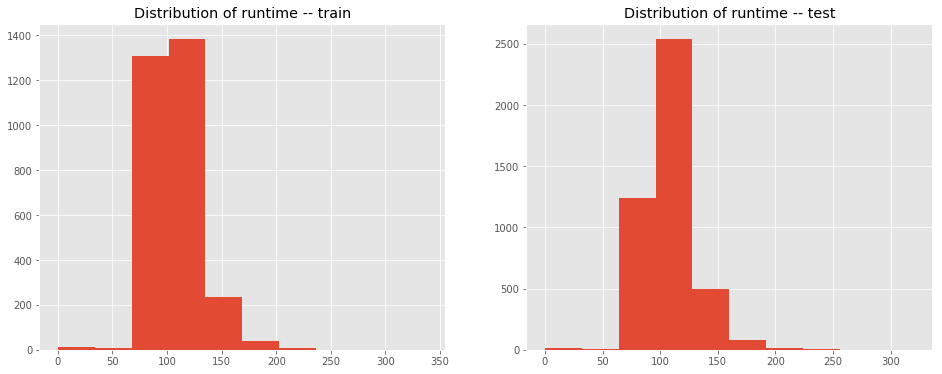

In [31]:
# Plot histogram
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(train['runtime']);
plt.title('Distribution of runtime -- train');

plt.subplot(1, 2, 2)
plt.hist(test['runtime']);
plt.title('Distribution of runtime -- test');

#### *status*

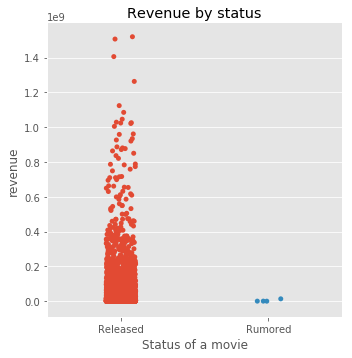

In [32]:
# Scatter plot
ax = sns.catplot(x='status', y='revenue', data=train);
ax.set(xlabel='Status of a movie', ylabel='revenue', title='Revenue by status')
plt.show()

Obviously, released movie tends to have higher revenue. However, since almost all the movies are released, this variable is not useful.

#### *tagline*

<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'Top words in overview -- train')

(-0.5, 1199.5, 999.5, -0.5)

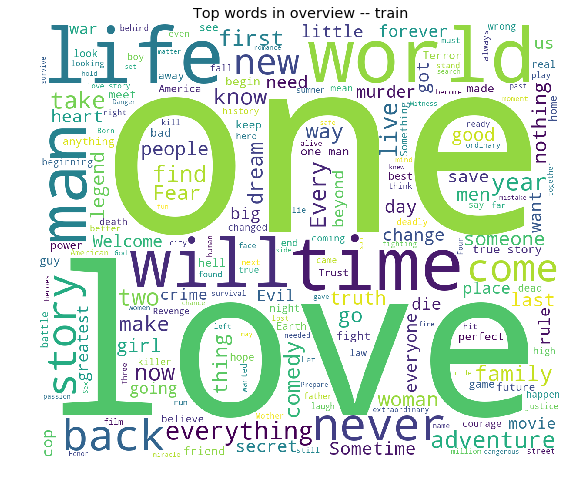

In [33]:
# Word cloud for train
plt.figure(figsize=(16, 8))
text = ' '.join(train['tagline'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in overview -- train')
plt.axis("off")
plt.show()

<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'Top words in overview -- test')

(-0.5, 1199.5, 999.5, -0.5)

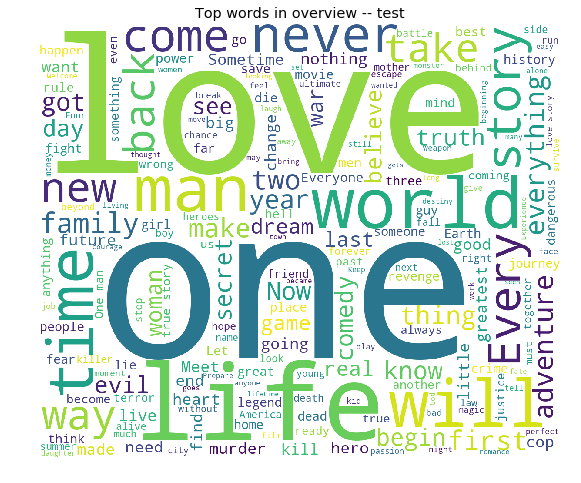

In [34]:
# Word cloud for test
plt.figure(figsize=(16, 8))
text = ' '.join(test['tagline'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in overview -- test')
plt.axis("off")
plt.show()

#### *Title*


In [35]:
vectorizer = TfidfVectorizer(
            sublinear_tf=True,
            analyzer='word',
            token_pattern=r'\w{1,}',
            ngram_range=(1, 2),
            min_df=5)

overview_text = vectorizer.fit_transform(train['overview'].fillna(''))
linreg = LinearRegression()
linreg.fit(overview_text, train['log_revenue'])
eli5.show_weights(linreg, vec=vectorizer, top=20, feature_filter=lambda x: x != '<BIAS>')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

NameError: name 'eli5' is not defined

In [ ]:
print('Target value:', train['log_revenue'][1000])
eli5.show_prediction(linreg, doc=train['overview'].values[1000], vec=vectorizer)

In [ ]:
# Correlation between revenue and other numerical columns

In [ ]:
# Drop all useless columns
useless_list=[]

In [ ]:
train['num_genres'] = train['genres'].apply(lambda x: len(x) if x != {} else 0)
train['all_genres'] = train['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_genres = [m[0] for m in Counter([i for j in list_of_genres for i in j]).most_common(15)]
for g in top_genres:
    train['genre_' + g] = train['all_genres'].apply(lambda x: 1 if g in x else 0)
    
test['num_genres'] = test['genres'].apply(lambda x: len(x) if x != {} else 0)
test['all_genres'] = test['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_genres:
    test['genre_' + g] = test['all_genres'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['genres'], axis=1)
test = test.drop(['genres'], axis=1)

In [ ]:
train['num_crew'] = train['crew'].apply(lambda x: len(x) if x != {} else 0)
top_crew_names = [m[0] for m in Counter([i for j in list_of_crew_names for i in j]).most_common(15)]
for g in top_crew_names:
    train['crew_name_' + g] = train['crew'].apply(lambda x: 1 if g in str(x) else 0)
train['genders_0_crew'] = train['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
train['genders_1_crew'] = train['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
train['genders_2_crew'] = train['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
top_crew_jobs = [m[0] for m in Counter([i for j in list_of_crew_jobs for i in j]).most_common(15)]
for j in top_crew_jobs:
    train['jobs_' + j] = train['crew'].apply(lambda x: sum([1 for i in x if i['job'] == j]))
top_crew_departments = [m[0] for m in Counter([i for j in list_of_crew_departments for i in j]).most_common(15)]
for j in top_crew_departments:
    train['departments_' + j] = train['crew'].apply(lambda x: sum([1 for i in x if i['department'] == j])) 
    
test['num_crew'] = test['crew'].apply(lambda x: len(x) if x != {} else 0)
for g in top_crew_names:
    test['crew_name_' + g] = test['crew'].apply(lambda x: 1 if g in str(x) else 0)
test['genders_0_crew'] = test['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
test['genders_1_crew'] = test['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
test['genders_2_crew'] = test['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
for j in top_crew_jobs:
    test['jobs_' + j] = test['crew'].apply(lambda x: sum([1 for i in x if i['job'] == j]))
for j in top_crew_departments:
    test['departments_' + j] = test['crew'].apply(lambda x: sum([1 for i in x if i['department'] == j])) 

train = train.drop(['crew'], axis=1)
test = test.drop(['crew'], axis=1)